In [1859]:
import numpy as np 
import yfinance as yf
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import matplotlib
%matplotlib inline


/tmp/ipykernel_1696984/3620799528.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [1860]:
symbols = "SPY" , "KO", "GOOG", "NKE", "V", "CL", "QQQ", "MCD"
df_multiple_symbols = yf.download(symbols, start="2013-01-01", end="2023-01-01")

[*********************100%***********************]  8 of 8 completed


In [1861]:
df_multiple_symbols.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, CL)    2518 non-null   float64
 1   (Adj Close, GOOG)  2518 non-null   float64
 2   (Adj Close, KO)    2518 non-null   float64
 3   (Adj Close, MCD)   2518 non-null   float64
 4   (Adj Close, NKE)   2518 non-null   float64
 5   (Adj Close, QQQ)   2518 non-null   float64
 6   (Adj Close, SPY)   2518 non-null   float64
 7   (Adj Close, V)     2518 non-null   float64
 8   (Close, CL)        2518 non-null   float64
 9   (Close, GOOG)      2518 non-null   float64
 10  (Close, KO)        2518 non-null   float64
 11  (Close, MCD)       2518 non-null   float64
 12  (Close, NKE)       2518 non-null   float64
 13  (Close, QQQ)       2518 non-null   float64
 14  (Close, SPY)       2518 non-null   float64
 15  (Close, V)         2518 non-null   float64
 16  (High,

In [1862]:
df_multiple_symbols = df_multiple_symbols["Close"]
df_multiple_symbols

,CL,GOOG,KO,MCD,NKE,QQQ,SPY,V
Date,,,,,,,,
2013-01-02,53.154999,18.013729,37.599998,90.120003,25.920000,67.199997,146.059998,38.845001
2013-01-03,53.330002,18.024191,37.599998,90.629997,26.184999,66.849998,145.729996,38.875000
2013-01-04,53.950001,18.380356,37.660000,89.849998,26.440001,66.629997,146.369995,39.192501
2013-01-07,53.040001,18.300158,37.299999,90.910004,26.480000,66.650002,145.970001,39.472500
2013-01-08,53.160000,18.264042,37.040001,90.940002,26.200001,66.519997,145.550003,39.840000
...,...,...,...,...,...,...,...,...
2022-12-23,79.449997,89.809998,63.820000,267.570007,116.250000,267.359985,382.910004,205.830002
2022-12-27,79.940002,87.930000,64.209999,266.839996,117.559998,263.579987,381.399994,206.289993
2022-12-28,78.820000,86.459999,63.570000,265.109985,114.980003,260.100006,376.660004,204.990005


In [1863]:
#ainult SPY ja DataFrameks
df_multiple_symbols = pd.DataFrame(df_multiple_symbols['SPY']) 

In [1864]:
df_multiple_symbols['SMA1'] = df_multiple_symbols['SPY'].rolling(55).mean() 
df_multiple_symbols['SMA2'] = df_multiple_symbols['SPY'].rolling(252).mean() 


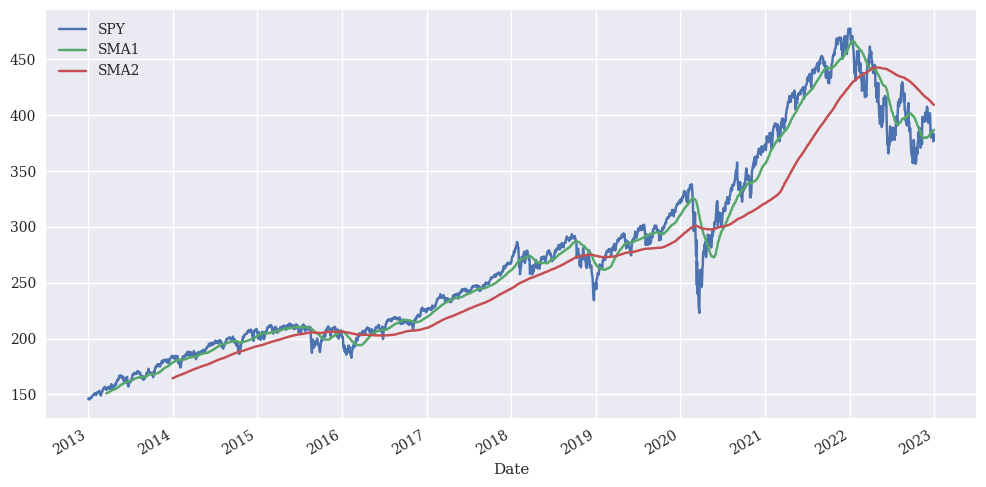

In [1865]:
df_multiple_symbols.plot(figsize=(12, 6));

In [1866]:
df_multiple_symbols.tail()

,SPY,SMA1,SMA2
Date,,,
2022-12-23,382.910004,385.369637,410.678811
2022-12-27,381.399994,385.708000,410.298414
2022-12-28,376.660004,386.010546,409.900755
2022-12-29,383.440002,386.477819,409.527580
2022-12-30,382.429993,386.948182,409.155636


/tmp/ipykernel_1696984/3201822249.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


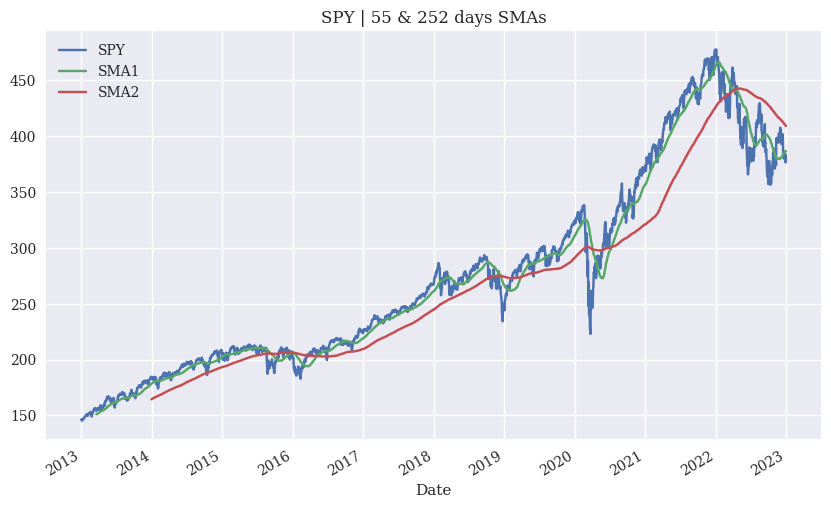

In [1867]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
df_multiple_symbols.plot(title='SPY | 55 & 252 days SMAs',
figsize=(10, 6));

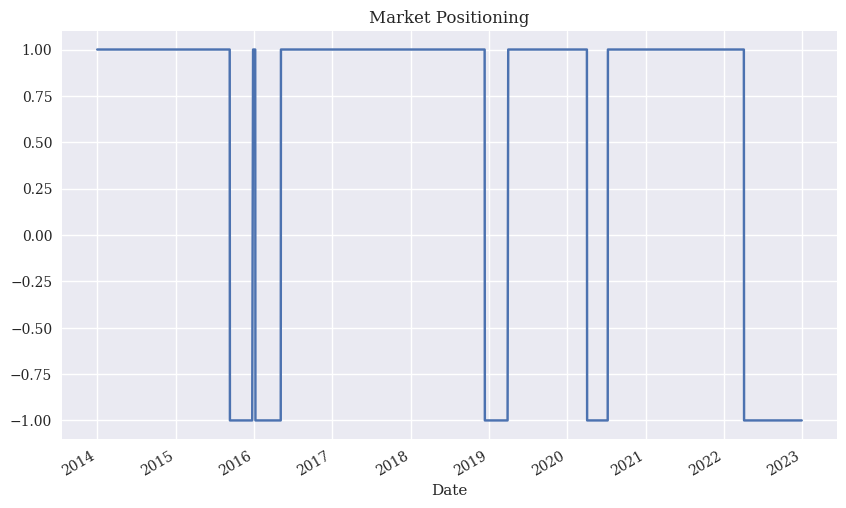

In [1868]:
df_multiple_symbols['position'] = np.where(df_multiple_symbols['SMA1'] > df_multiple_symbols['SMA2'], 1, -1)
df_multiple_symbols.dropna(inplace=True) 
df_multiple_symbols['position'].plot(ylim=[-1.1, 1.1],title='Market Positioning',figsize=(10, 6));

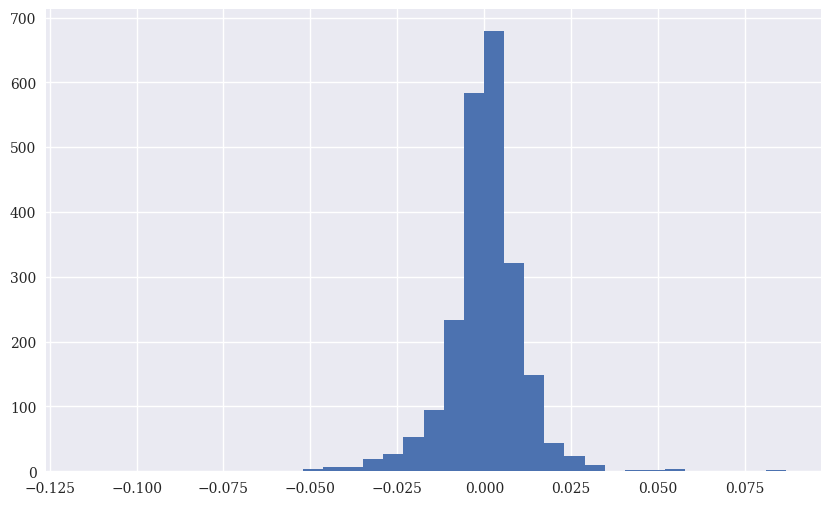

In [1869]:
df_multiple_symbols['returns'] = np.log(df_multiple_symbols['SPY'] / df_multiple_symbols['SPY'].shift(1)) 
df_multiple_symbols['returns'].hist(bins=35, figsize=(10, 6)); 

In [1870]:
df_multiple_symbols['strategy'] = df_multiple_symbols['position'].shift(1) * df_multiple_symbols['returns'] 
df_multiple_symbols[['returns', 'strategy']].sum()


returns     0.727867
strategy    0.213307
dtype: float64

In [1871]:
df_multiple_symbols[['returns', 'strategy']].sum().apply(np.exp) 

returns     2.070659
strategy    1.237765
dtype: float64

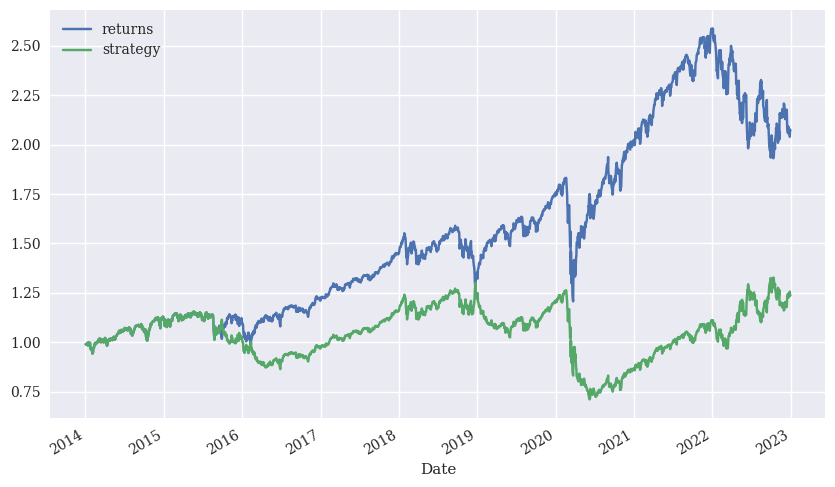

In [1872]:
df_multiple_symbols[['returns', 'strategy']].cumsum( ).apply(np.exp).plot(figsize=(10, 6));

In [1873]:
df_multiple_symbols[['returns', 'strategy']].mean() * 252 

returns     0.080945
strategy    0.023722
dtype: float64

In [1874]:
np.exp(df_multiple_symbols[['returns', 'strategy']].mean() * 252) - 1 

returns     0.084312
strategy    0.024005
dtype: float64

In [1875]:
df_multiple_symbols[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.180899
strategy    0.180965
dtype: float64

In [1876]:
(df_multiple_symbols[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5 

returns     0.180228
strategy    0.180244
dtype: float64

In [1877]:
df_multiple_symbols['cumret'] = df_multiple_symbols['strategy'].cumsum().apply(np.exp) 

In [1878]:
df_multiple_symbols['cummax'] = df_multiple_symbols['cumret'].cummax() 

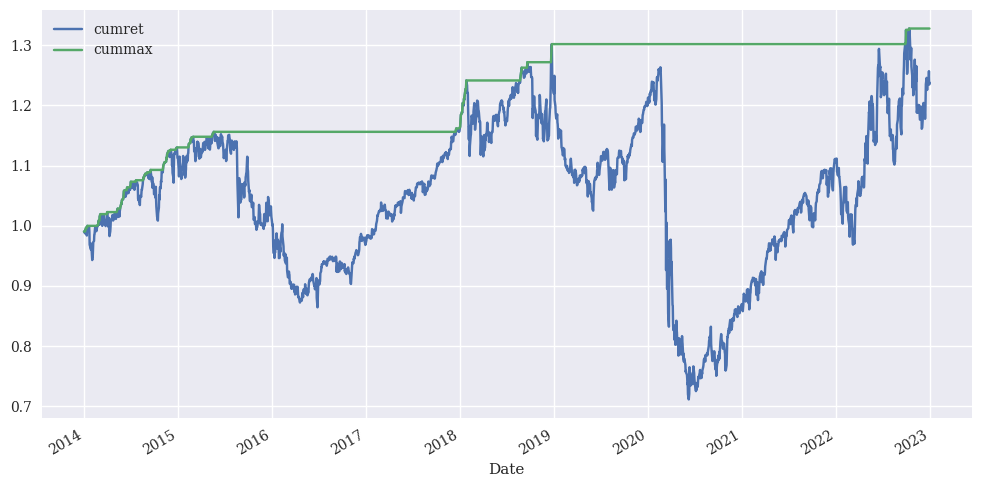

In [1879]:
df_multiple_symbols[['cumret', 'cummax']].dropna().plot(figsize=(12, 6));

In [1880]:
drawdown = df_multiple_symbols['cummax'] - df_multiple_symbols['cumret']
drawdown.max() 

0.5900660502583578

In [1881]:
temp = drawdown[drawdown == 0] 

In [1882]:
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime()) 

In [1883]:
import numpy as np
import pandas as pd
from scipy.optimize import brute
import yfinance as yf
 
class SMAVectorBacktester(object):

    def __init__(self, symbol, SMA1, SMA2, start, end):
        self.symbol = symbol
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.start = start
        self.end = end
        self.results = None
        self.get_data()

    def get_data(self):

        symbols = "SPY", "KO"
        raw = yf.download(symbols, start="2013-01-01", end="2023-01-01")
        raw = raw["Close"]
        raw = pd.DataFrame(raw[self.symbol])
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['return'] = np.log(raw / raw.shift(1))
        raw['SMA1'] = raw['price'].rolling(self.SMA1).mean()
        raw['SMA2'] = raw['price'].rolling(self.SMA2).mean()
        self.data = raw

    def set_parameters(self, SMA1=None, SMA2=None):

        if SMA1 is not None:
            self.SMA1 = SMA1
            self.data['SMA1'] = self.data['price'].rolling(
                self.SMA1).mean()
        if SMA2 is not None:
            self.SMA2 = SMA2
            self.data['SMA2'] = self.data['price'].rolling(self.SMA2).mean()

    def run_strategy(self):

        data = self.data.copy().dropna()
        data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
        data['strategy'] = data['position'].shift(1) * data['return']
        data.dropna(inplace=True)
        data['creturns'] = data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
        self.results = data
        # gross performance of the strategy
        aperf = data['cstrategy'].iloc[-1]
        # out-/underperformance of strategy
        operf = aperf - data['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)

    def plot_results(self):

        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | SMA1=%d, SMA2=%d' % (self.symbol,
        self.SMA1, self.SMA2)
        self.results[['creturns', 'cstrategy']].plot(title=title,
        figsize=(10, 6))

    def update_and_run(self, SMA):

        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.run_strategy()[0]

    def optimize_parameters(self, SMA1_range, SMA2_range):

        opt = brute(self.update_and_run, (SMA1_range, SMA2_range), finish=None)
        return opt, -self.update_and_run(opt)

if __name__ == '__main__':
    smabt = SMAVectorBacktester("SPY", 42, 252, "2013-01-01","2023-01-01")
    print(smabt.run_strategy())
    smabt.set_parameters(SMA1=20, SMA2=100)
    print(smabt.run_strategy())
    print(smabt.optimize_parameters((30, 56, 4), (200, 300, 4)))


[*********************100%***********************]  2 of 2 completed
(1.39, -0.68)
(1.03, -1.28)
(array([ 46., 240.]), 1.51)


In [1884]:
SMAVectorBacktester

__main__.SMAVectorBacktester

In [1885]:
smabt = SMAVectorBacktester('SPY', 42, 252, "2013-1-1", "2019-12-31")

[*********************100%***********************]  2 of 2 completed


In [1886]:
smabt.run_strategy()

(1.22, -0.52)

In [1887]:
%%time
smabt.optimize_parameters((30, 50, 2),(200, 300, 2)) 

CPU times: user 4.37 s, sys: 33.2 ms, total: 4.4 s
Wall time: 5.68 s


(array([ 32., 216.]), 1.55)

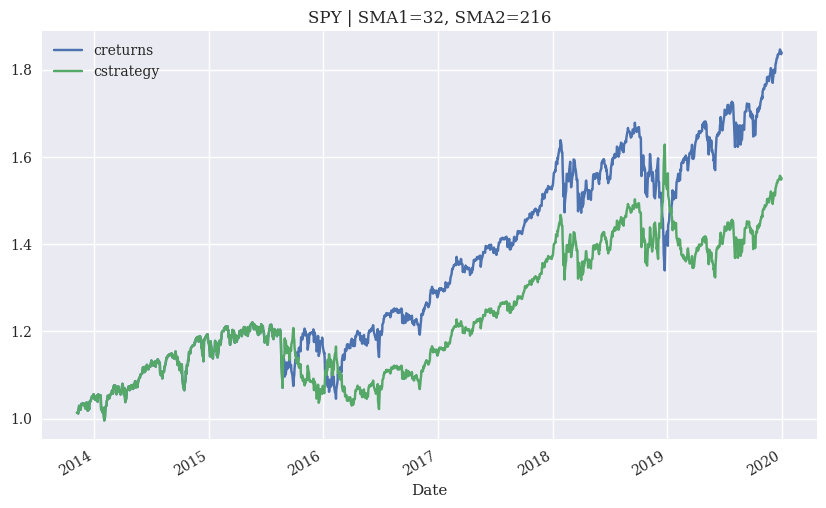

In [1888]:
smabt.plot_results() 

In [1889]:
#momentum strategies

In [1890]:
data = pd.DataFrame(df_multiple_symbols['SPY'])

In [1891]:
data.rename(columns={'SPY': 'price'}, inplace=True)

In [1892]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [1893]:
data['position'] = np.sign(data['returns']) 

In [1894]:
data['strategy'] = data['position'].shift(1) * data['returns'] 

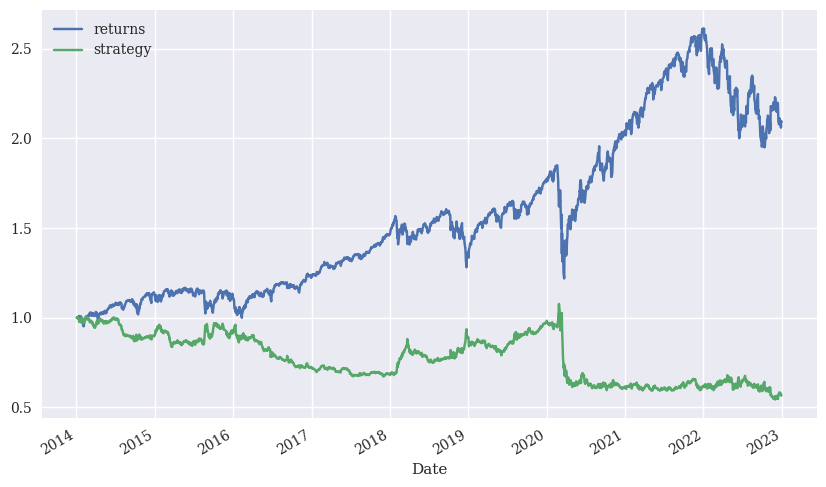

In [1895]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6)); 

In [1896]:
data['position'] = np.sign(data['returns'].rolling(3).mean()) 

In [1897]:
data['strategy'] = data['position'].shift(1) * data['returns']

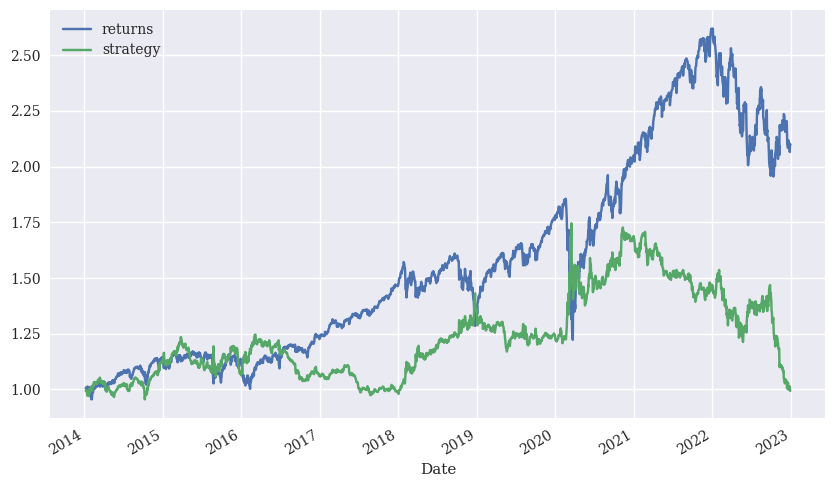

In [1898]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [1899]:
#SPY 1 tunnine time period ja 356 päeva
symbols = "SPY"
data = yf.download(symbols, start="2022-01-01", end="2023-01-01", period="1h")

[*********************100%***********************]  1 of 1 completed


In [1900]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [1901]:
data['returns'] = np.log(data['Close'] /  data['Close'].shift(1)) 

In [1902]:
to_plot = ['returns'] 

In [1903]:
for m in [1, 3, 5, 7, 9]:
    data['position_%d' % m] = np.sign(data['returns'].rolling(m).mean())
    data['strategy_%d' % m] = (data['position_%d' % m].shift(1) *
    data['returns'])
    to_plot.append('strategy_%d' % m) 

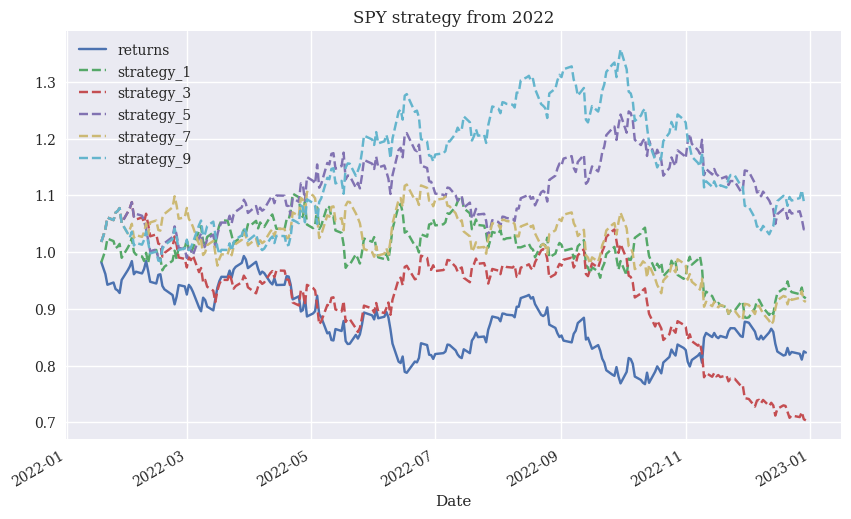

In [1904]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(
    title='SPY strategy from 2022',
    figsize=(10, 6), style=['-', '--', '--', '--', '--', '--']);

In [1905]:
import numpy as np
import pandas as pd

class MomVectorBacktester(object):

    def __init__(self, symbol, start, end, amount, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.amount = amount
        self.tc = tc
        self.results = None
        self.get_data()

    def get_data(self):

        symbols = "SPY", "KO", "JPM", "COST", "XLU", "GLD", "CL", "JNJ", "XLU", "XLP", "X"
        raw = yf.download(symbols, start="2013-01-01", end="2023-01-01")
        raw = raw["Close"]
        raw = pd.DataFrame(raw[self.symbol])
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['return'] = np.log(raw / raw.shift(1))
        self.data = raw

    def run_strategy(self, momentum=1):
        ''' Backtests the trading strategy.
        '''
        self.momentum = momentum
        data = self.data.copy().dropna()
        data['position'] = np.sign(data['return'].rolling(momentum).mean())
        data['strategy'] = data['position'].shift(1) * data['return']
        # determine when a trade takes place
        data.dropna(inplace=True)
        trades = data['position'].diff().fillna(0) != 0
        # subtract transaction costs from return when trade takes place
        data['strategy'][trades] -= self.tc
        data['creturns'] = self.amount * data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = self.amount * \
            data['strategy'].cumsum().apply(np.exp)
        self.results = data
        # absolute performance of the strategy
        aperf = data['cstrategy'].iloc[-1]
        # out-/underperformance of strategy
        operf = aperf - self.results['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)

    def plot_results(self):
        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | TC = %.4f' % (self.symbol, self.tc)
        self.results[['creturns', 'cstrategy']].plot(title=title,
        figsize=(10, 6))


if __name__ == '__main__':
    mombt = MomVectorBacktester('GLD', '2014-01-01', '2022-01-01', 10000, 0.0)
    print(mombt.run_strategy())
    print(mombt.run_strategy(momentum=2))
    mombt = MomVectorBacktester('GLD', '2014-01-01', '2022-01-01', 10000, 0.001)
    print(mombt.run_strategy(momentum=2))

[*********************100%***********************]  10 of 10 completed
(10332.21, -3999.25)
(7440.85, -6865.43)
[*********************100%***********************]  10 of 10 completed
(3788.55, -10517.72)


In [1906]:
mombt = MomVectorBacktester('GLD', '2010-1-1','2019-12-31', 10000, 0.0) 

[*********************100%***********************]  10 of 10 completed


In [1907]:
mombt.run_strategy(momentum=3)

(18371.5, 9408.31)

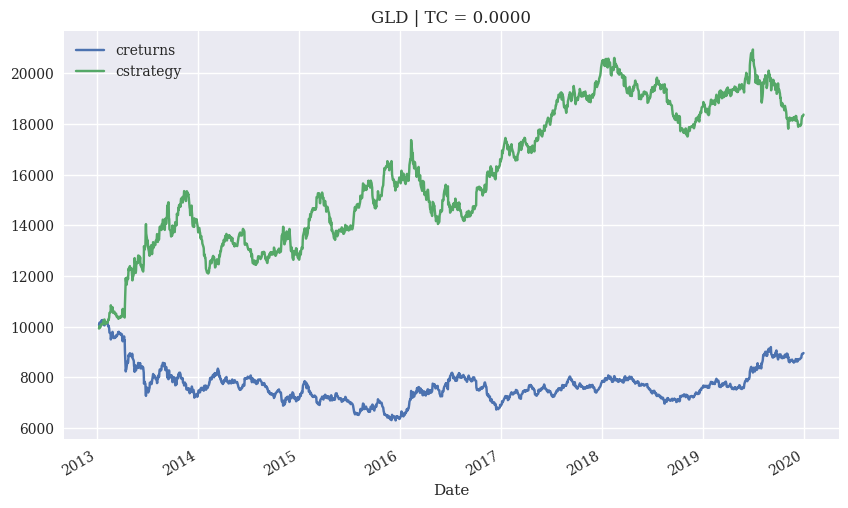

In [1908]:
mombt.plot_results()

In [1909]:
mombt = MomVectorBacktester('GLD', '2014-1-1','2022-12-31', 10000, 0.001) 

[*********************100%***********************]  10 of 10 completed


In [1910]:
mombt.run_strategy(momentum=3) 

(8602.99, -5674.06)

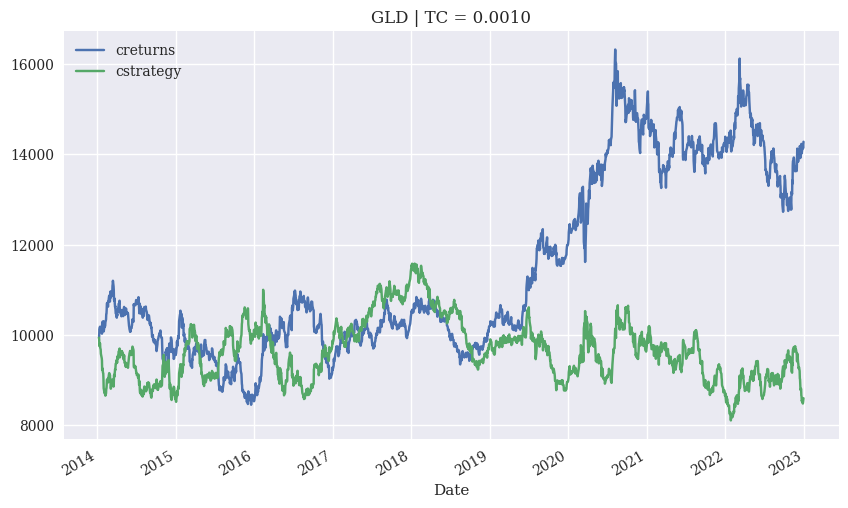

In [1911]:
mombt.plot_results()

In [1912]:
symbols = "KO"
data = yf.download(symbols, start="2013-01-01", end="2023-01-01")
#data = pd.DataFrame(data['SPY'])
data.iloc[:1]

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,36.990002,37.599998,36.66,37.599998,27.033924,21872400


In [1913]:
data.rename(columns={'KO': 'price'}, inplace=True)

In [1914]:
data['returns'] = np.log(data['Close'] / data['Close'].shift(1))

In [1915]:
SMA = 21

In [1916]:
data['SMA'] = data['Close'].rolling(SMA).mean() 

In [1917]:
threshold = 2

In [1918]:
data['distance'] = data['Close'] - data['SMA'] 

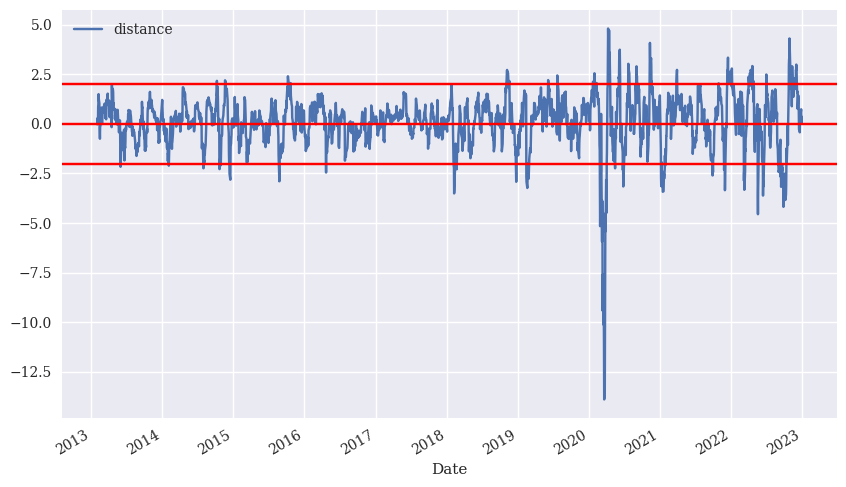

In [1919]:
data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r');

In [1920]:
data['position'] = np.where(data['distance'] > threshold,  -1, np.nan)

In [1921]:
data['position'] = np.where(data['distance'] < -threshold, 1, data['position']) 

In [1922]:
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position']) 

In [1923]:
data['position'] = data['position'].ffill().fillna(0) 

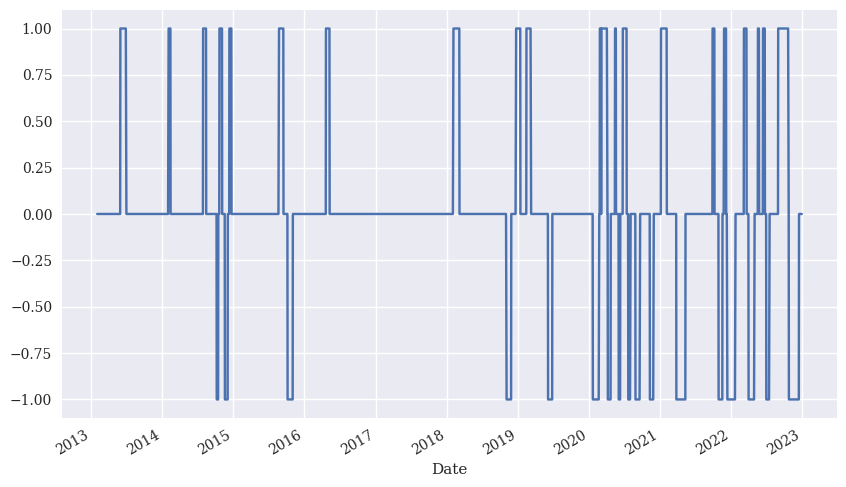

In [1924]:
data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1],  figsize=(10, 6)); 

In [1925]:
data['strategy'] = data['position'].shift(1) * data['returns']

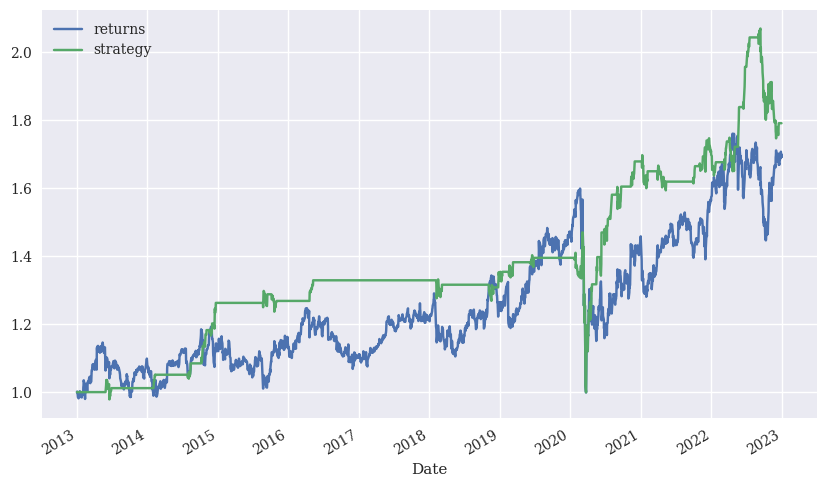

In [1926]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [1927]:

class MRVectorBacktester(MomVectorBacktester):


    def run_strategy(self, SMA, threshold):

        data = self.data.copy().dropna()
        data['sma'] = data['price'].rolling(SMA).mean()
        data['distance'] = data['price'] - data['sma']
        data.dropna(inplace=True)
        # sell signals
        data['position'] = np.where(data['distance'] > threshold,
                                    -1, np.nan)
        # buy signals
        data['position'] = np.where(data['distance'] < -threshold,
                                    1, data['position'])
        # crossing of current price and SMA (zero distance)
        data['position'] = np.where(data['distance'] *
                                    data['distance'].shift(1) < 0,
                                    0, data['position'])
        data['position'] = data['position'].ffill().fillna(0)
        data['strategy'] = data['position'].shift(1) * data['return']
        # determine when a trade takes place
        trades = data['position'].diff().fillna(0) != 0
        # subtract transaction costs from return when trade takes place
        data['strategy'][trades] -= self.tc
        data['creturns'] = self.amount * \
            data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = self.amount * \
            data['strategy'].cumsum().apply(np.exp)
        self.results = data
        # absolute performance of the strategy
        aperf = self.results['cstrategy'].iloc[-1]
        # out-/underperformance of strategy
        operf = aperf - self.results['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)


if __name__ == '__main__':
    mrbt = MRVectorBacktester('KO', '2010-1-1', '2020-12-31', 10000, 0.0)
    print(mrbt.run_strategy(SMA=25, threshold=5))
    mrbt = MRVectorBacktester('KO', '2010-1-1', '2020-12-31', 10000, 0.001)
    print(mrbt.run_strategy(SMA=25, threshold=5))
    mrbt = MRVectorBacktester('KO', '2010-1-1', '2020-12-31', 10000, 0.001)
    print(mrbt.run_strategy(SMA=42, threshold=7.5))

[*********************100%***********************]  10 of 10 completed
(8968.38, -5346.42)
[*********************100%***********************]  10 of 10 completed
(8950.46, -5364.34)
[*********************100%***********************]  10 of 10 completed
(9971.55, -4155.18)


In [1928]:
mrbt = MRVectorBacktester("XLU", '2013-01-01', '2022-12-31', 10000, 0.001) 

[*********************100%***********************]  10 of 10 completed


In [1929]:
mrbt.run_strategy(SMA=55, threshold=2)

(22169.34, 3670.26)

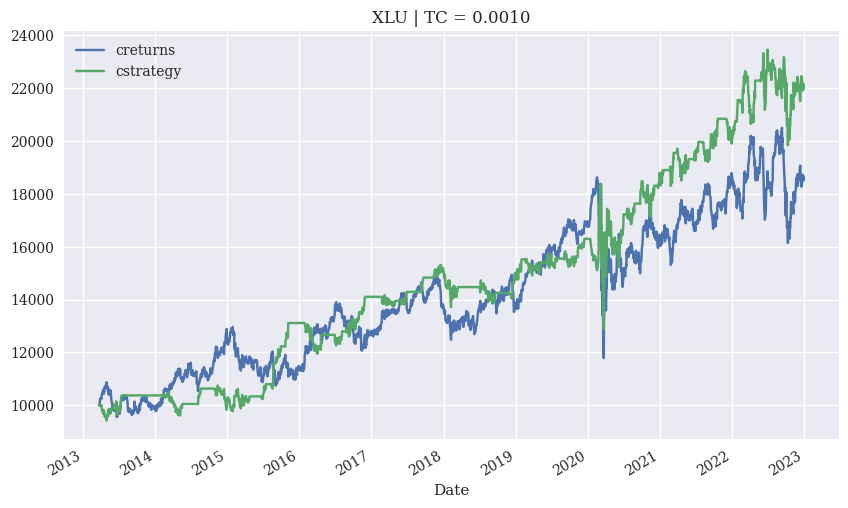

In [1930]:
mrbt.plot_results()

In [1931]:
symbols = "SPY", "KO", "JPM", "COST", "XLU", "GLD", "CL", "JNJ", "XLU", "XLP", "X"
data = yf.download(symbols, start="2013-01-01", end="2023-01-01")
data = data["Close"]

[*********************100%***********************]  10 of 10 completed


In [1932]:
symbol = 'KO'
data = pd.DataFrame(data[symbol]) 

In [1933]:
data.rename(columns={symbol: 'price'}, inplace=True) 

In [1934]:
lags = 5

In [1935]:
cols = []
for lag in range(1, lags + 1):
     col = f'lag_{lag}'
     data[col] = data['price'].shift(lag)
     cols.append(col)
     data.dropna(inplace=True)

In [1936]:
reg = np.linalg.lstsq(data[cols], data['price'],  rcond=None)[0]

In [1937]:
reg

array([ 0.97125664,  0.05391661, -0.06256578, -0.03756728,  0.07516061])

In [1938]:
data['prediction'] = np.dot(data[cols], reg) 

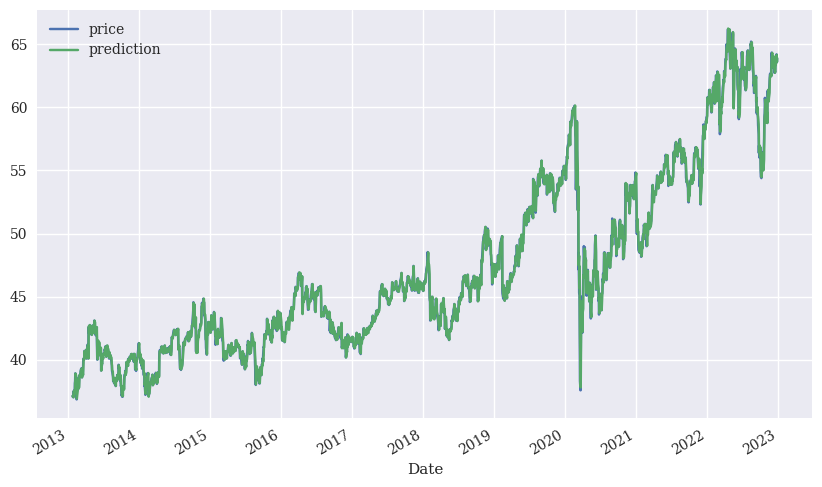

In [1939]:
data[['price', 'prediction']].plot(figsize=(10, 6)); 

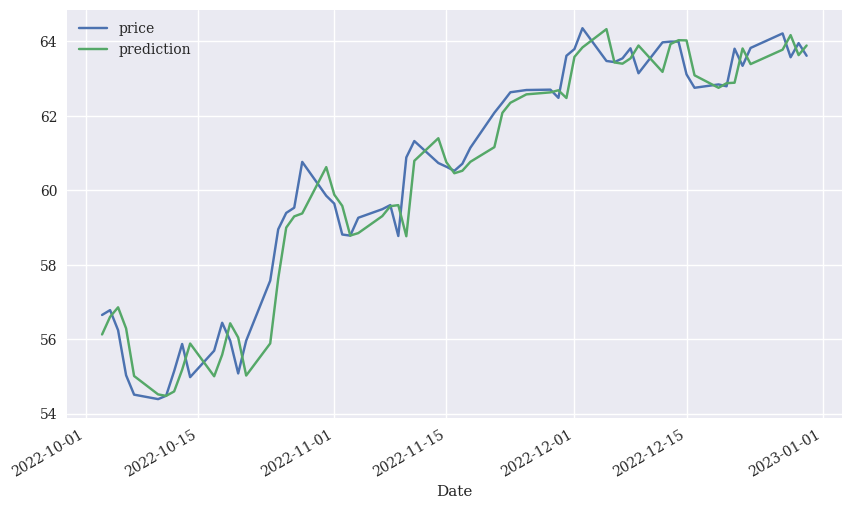

In [1940]:
data[['price', 'prediction']].loc['2022-10-1':].plot(figsize=(10, 6));

In [1941]:
##prediction future prices
data['return'] = np.log(data['price'] /  data['price'].shift(1))

In [1942]:
data.dropna(inplace=True) 

In [1943]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag)
    cols.append(col)
    data.dropna(inplace=True)

In [1944]:
reg = np.linalg.lstsq(data[cols], data['return'], rcond=None)[0]

In [1945]:
reg

array([-0.02195085,  0.02767445, -0.03810781, -0.07299911,  0.06604811])

In [1946]:
data['prediction'] = np.dot(data[cols], reg)

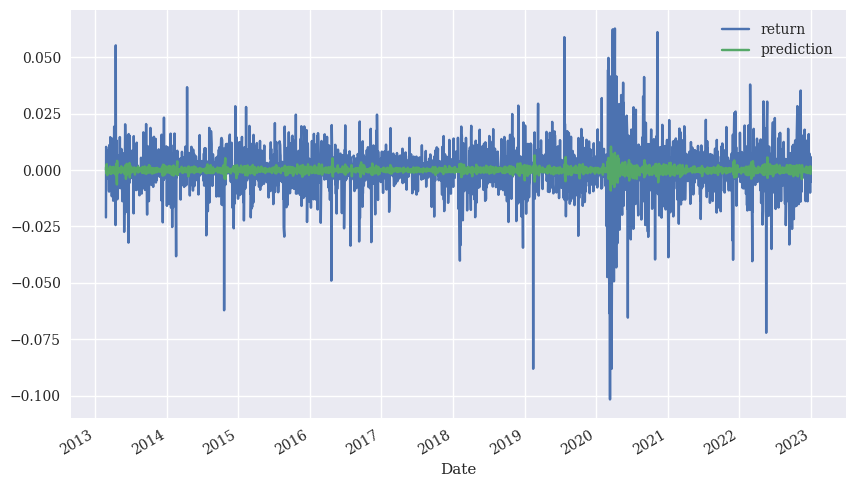

In [1947]:
data[['return', 'prediction']].iloc[lags:].plot(figsize=(10, 6));

In [1948]:
hits = np.sign(data['return'] * data['prediction']).value_counts()

In [1949]:
hits

 1.0    1245
-1.0    1218
 0.0      24
Name: count, dtype: int64

In [1950]:
hits.values[0] / sum(hits)

0.5006031363088058

In [1951]:
reg = np.linalg.lstsq(data[cols], np.sign(data['return']), rcond=None)[0] 

In [1952]:
reg

array([-2.42334226, -1.64241839, -1.43051601, -3.64523724,  1.29003216])

In [1953]:
data['prediction'] = np.sign(np.dot(data[cols], reg)) 

In [1954]:
data['prediction'].value_counts()

prediction
-1.0    1359
 1.0    1128
Name: count, dtype: int64

In [1955]:
hits = np.sign(data['return'] * data['prediction']).value_counts()

In [1956]:
hits

 1.0    1246
-1.0    1217
 0.0      24
Name: count, dtype: int64

In [1957]:
hits.values[0] / sum(hits)

0.501005227181343

In [1958]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2013-02-15,37.419998,-0.009993,-0.009362,-0.027572,-0.004135,-0.003605,1.0,0.015621
2013-02-19,37.669998,0.015621,-0.009993,-0.009362,-0.027572,-0.004135,1.0,0.006659
2013-02-20,37.730000,0.006659,0.015621,-0.009993,-0.009362,-0.027572,-1.0,0.001592
2013-02-21,37.709999,0.001592,0.006659,0.015621,-0.009993,-0.009362,-1.0,-0.000530
2013-02-22,38.520000,-0.000530,0.001592,0.006659,0.015621,-0.009993,-1.0,0.021252


In [1959]:
data['strategy'] = data['prediction'] * data['return']

In [1960]:
data[['return', 'strategy']].sum().apply(np.exp) 

return      1.726656
strategy    3.111910
dtype: float64

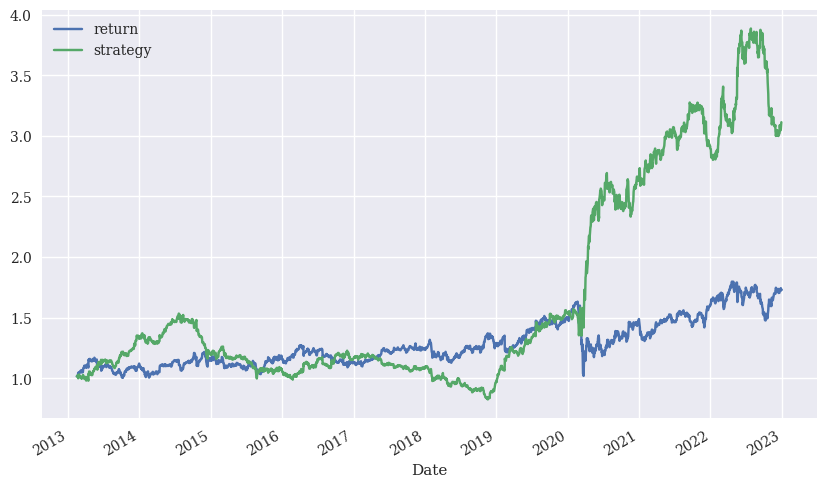

In [1961]:
data[['return', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [1962]:

import numpy as np
import pandas as pd


class LRVectorBacktester(object):


    def __init__(self, symbol, start, end, amount, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.amount = amount
        self.tc = tc
        self.results = None
        self.get_data()

    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        symbols = "SPY", "KO", "JPM", "COST", "XLU", "GLD", "CL", "JNJ", "XLU", "XLP", "X"
        raw = yf.download(symbols, start="2013-01-01", end="2023-01-01")
        raw = raw["Close"]
        raw = pd.DataFrame(raw[self.symbol])
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['returns'] = np.log(raw / raw.shift(1))
        self.data = raw.dropna()

    def select_data(self, start, end):
        ''' Selects sub-sets of the financial data.
        '''
        data = self.data[(self.data.index >= start) &
        (self.data.index <= end)].copy()
        return data

    def prepare_lags(self, start, end):
        ''' Prepares the lagged data for the regression and prediction steps.
        '''
        data = self.select_data(start, end)
        self.cols = []
        for lag in range(1, self.lags + 1):
            col = f'lag_{lag}'
            data[col] = data['returns'].shift(lag)
            self.cols.append(col)
        data.dropna(inplace=True)
        self.lagged_data = data

    def fit_model(self, start, end):
        ''' Implements the regression step.
        '''
        self.prepare_lags(start, end)
        reg = np.linalg.lstsq(self.lagged_data[self.cols],

        np.sign(self.lagged_data['returns']),
        rcond=None)[0]
        self.reg = reg

    def run_strategy(self, start_in, end_in, start_out, end_out, lags=3):
        ''' Backtests the trading strategy.
        '''
        self.lags = lags
        self.fit_model(start_in, end_in)
        self.results = self.select_data(start_out, end_out).iloc[lags:]
        self.prepare_lags(start_out, end_out)
        prediction = np.sign(np.dot(self.lagged_data[self.cols], self.reg))
        self.results['prediction'] = prediction
        self.results['strategy'] = self.results['prediction'] * \
                                   self.results['returns']
        # determine when a trade takes place
        trades = self.results['prediction'].diff().fillna(0) != 0
        # subtract transaction costs from return when trade takes place
        self.results['strategy'][trades] -= self.tc
        self.results['creturns'] = self.amount * \
                        self.results['returns'].cumsum().apply(np.exp)
        self.results['cstrategy'] = self.amount * \
                        self.results['strategy'].cumsum().apply(np.exp)
        # gross performance of the strategy
        aperf = self.results['cstrategy'].iloc[-1]
        # out-/underperformance of strategy
        operf = aperf - self.results['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)

    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to the symbol.
        '''
        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | TC = %.4f' % (self.symbol, self.tc)
        self.results[['creturns', 'cstrategy']].plot(title=title,
                                                     figsize=(10, 6))


if __name__ == '__main__':
    lrbt = LRVectorBacktester('SPY', '2014-1-1', '2018-06-29', 10000, 0.0)
    print(lrbt.run_strategy('2014-1-1', '2019-12-31',
                            '2014-1-1', '2019-12-31'))
    print(lrbt.run_strategy('2014-1-1', '2015-12-31',
                            '2016-1-1', '2019-12-31'))
    lrbt = LRVectorBacktester('KO', '2010-1-1', '2019-12-31', 10000, 0.001)
    print(lrbt.run_strategy('2014-1-1', '2019-12-31',
                            '2014-1-1', '2019-12-31', lags=5))
    print(lrbt.run_strategy('2014-1-1', '2016-12-31',
                            '2017-1-1', '2019-12-31', lags=5))

[*********************100%***********************]  10 of 10 completed
(11753.67, -3031.59)
(13144.0, -500.5)
[*********************100%***********************]  10 of 10 completed
(9617.82, -4240.47)
(14905.14, 1509.69)


In [1963]:
lrbt = LRVectorBacktester('KO', '2014-1-1', '2022-12-31',10000, 0.0) 

[*********************100%***********************]  10 of 10 completed


In [1964]:
lrbt.run_strategy('2010-1-1', '2019-12-31', '2010-1-1', '2019-12-31', lags=5) 

(20744.58, 6813.04)

In [1965]:
lrbt.run_strategy('2010-1-1', '2017-12-31', '2018-1-1', '2019-12-31', lags=5) 

(16635.93, 4603.32)

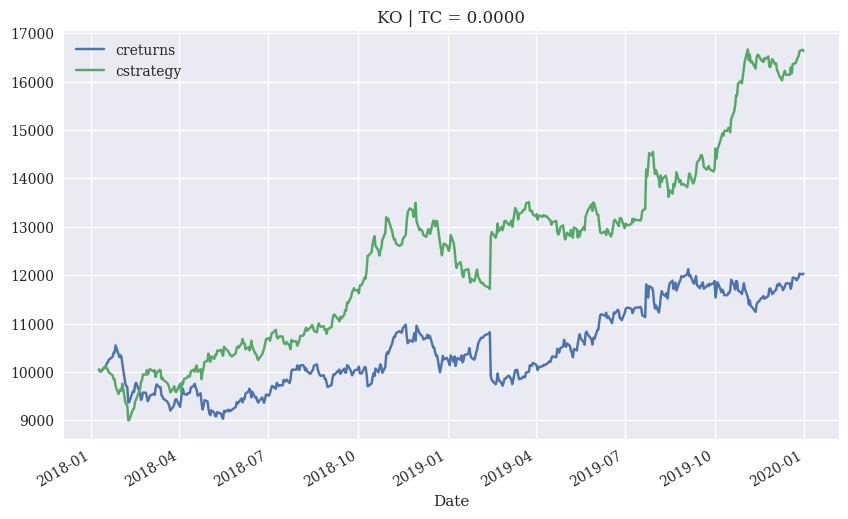

In [1966]:
lrbt.plot_results() 

In [1967]:
def __init__(self, symbol, start, end, amount,
 ftc=0.0, ptc=0.0, verbose=True):
 self.symbol = symbol
 self.start = start
 self.end = end
 self.initial_amount = amount
 self.amount = amount
 self.ftc = ftc
 self.ptc = ptc
 self.units = 0
 self.position = 0
 self.trades = 0
 self.verbose = verbose
 self.get_data()

In [1968]:
def get_data(self):

 symbols = "SPY", "KO", "JPM", "COST", "XLU", "GLD", "CL", "JNJ", "XLU", "XLP", "X"
 raw = yf.download(symbols, start="2013-01-01", end="2023-01-01")
 raw = pd.DataFrame(raw[self.symbol])
 raw = raw.loc[self.start:self.end]
 raw.rename(columns={self.symbol: 'price'}, inplace=True)
 raw['return'] = np.log(raw / raw.shift(1))
 self.data = raw.dropna()

In [1969]:
def plot_data(self, cols=None):
 ''' Plots the closing prices for symbol.
 '''
 if cols is None:
    cols = ['price']
    self.data['price'].plot(figsize=(10, 6), title=self.symbol)

In [1970]:
def get_date_price(self, bar):
 ''' Return date and price for bar
 '''
 date = str(self.data.index[bar])[:10]
 price = self.data.price.iloc[bar]
 return date, price

In [1971]:
def print_balance(self, bar):
 ''' Print out current cash balance info.
 '''
 date, price = self.get_date_price(bar)
 print(f'{date} | current balance {self.amount:.2f}')


In [1972]:
def print_net_wealth(self, bar):
 ''' Print out current cash balance info.
 '''
 date, price = self.get_date_price(bar)
 net_wealth = self.units * price + self.amount
 print(f'{date} | current net wealth {net_wealth:.2f}')

In [1973]:
def place_buy_order(self, bar, units=None, amount=None):
 ''' Place a buy order.
 '''
 date, price = self.get_date_price(bar)
 if units is None:
    units = int(amount / price)
    self.amount -= (units * price) * (1 + self.ptc) + self.ftc
    self.units += units
    self.trades += 1
    if self.verbose:

        print(f'{date} | selling {units} units at {price:.2f}')
        self.print_balance(bar)
        self.print_net_wealth(bar)

In [1974]:
def place_sell_order(self, bar, units=None, amount=None):
 ''' Place a sell order.
 '''
 date, price = self.get_date_price(bar)
 if units is None:

    units = int(amount / price)
    self.amount += (units * price) * (1 - self.ptc) - self.ftc
    self.units -= units
    self.trades += 1
    if self.verbose:
        print(f'{date} | selling {units} units at {price:.2f}')
        self.print_balance(bar)
        self.print_net_wealth(bar)

In [1975]:
def close_out(self, bar):
 ''' Closing out a long or short position.
 '''
 date, price = self.get_date_price(bar)
 self.amount += self.units * price
 self.units = 0
 self.trades += 1
 if self.verbose:
        
    print(f'{date} | inventory {self.units} units at {price:.2f}')
    print('=' * 55)
    print('Final balance [$] {:.2f}'.format(self.amount))
    perf = ((self.amount - self.initial_amount) /
    self.initial_amount * 100)
    print('Net Performance [%] {:.2f}'.format(perf))
    print('Trades Executed [#] {:.2f}'.format(self.trades))
    print('=' * 55)

/tmp/ipykernel_1696984/2546563087.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[*********************100%***********************]  10 of 10 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2014-01-03 to 2022-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2265 non-null   float64
 1   return  2265 non-null   float64
dtypes: float64(2)
memory usage: 53.1 KB
None
                 price    return
Date                            
2022-12-23  382.910004  0.005736
2022-12-27  381.399994 -0.003951
2022-12-28  376.660004 -0.012506
2022-12-29  383.440002  0.017840
2022-12-30  382.429993 -0.002638


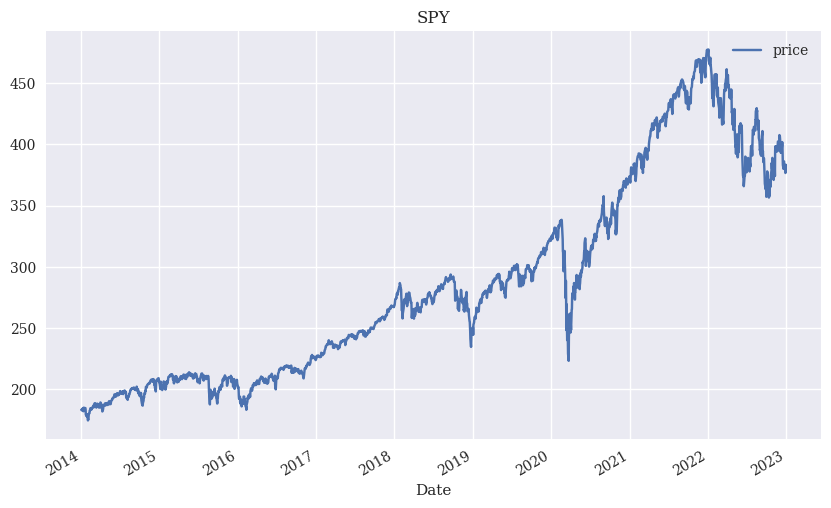

In [1976]:

import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'


class BacktestBase(object):

    def __init__(self, symbol, start, end, amount,
                 ftc=0.0, ptc=0.0, verbose=True):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_amount = amount
        self.amount = amount
        self.ftc = ftc
        self.ptc = ptc
        self.units = 0
        self.position = 0
        self.trades = 0
        self.verbose = verbose
        self.get_data()

    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        symbols = "SPY", "KO", "JPM", "COST", "XLU", "GLD", "CL", "JNJ", "XLU", "XLP", "X"
        raw = yf.download(symbols, start="2013-01-01", end="2023-01-01")
        raw = raw["Close"]
        raw = pd.DataFrame(raw[self.symbol])
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['return'] = np.log(raw / raw.shift(1))
        self.data = raw.dropna()

    def plot_data(self, cols=None):
        ''' Plots the closing prices for symbol.
        '''
        if cols is None:
            cols = ['price']
        self.data[cols].plot(figsize=(10, 6), title=self.symbol)

    def get_date_price(self, bar):
        ''' Return date and price for bar.
        '''
        date = str(self.data.index[bar])[:10]
        price = self.data.price.iloc[bar]
        return date, price

    def print_balance(self, bar):
        ''' Print out current cash balance info.
        '''
        date, price = self.get_date_price(bar)
        print(f'{date} | current balance {self.amount:.2f}')

    def print_net_wealth(self, bar):
        ''' Print out current cash balance info.
        '''
        date, price = self.get_date_price(bar)
        net_wealth = self.units * price + self.amount
        print(f'{date} | current net wealth {net_wealth:.2f}')

    def place_buy_order(self, bar, units=None, amount=None):
        ''' Place a buy order.
        '''
        date, price = self.get_date_price(bar)
        if units is None:
            units = int(amount / price)
        self.amount -= (units * price) * (1 + self.ptc) + self.ftc
        self.units += units
        self.trades += 1
        if self.verbose:
            print(f'{date} | buying {units} units at {price:.2f}')
            self.print_balance(bar)
            self.print_net_wealth(bar)

    def place_sell_order(self, bar, units=None, amount=None):
        ''' Place a sell order.
        '''
        date, price = self.get_date_price(bar)
        if units is None:
            units = int(amount / price)
        self.amount += (units * price) * (1 - self.ptc) - self.ftc
        self.units -= units
        self.trades += 1
        if self.verbose:
            print(f'{date} | selling {units} units at {price:.2f}')
            self.print_balance(bar)
            self.print_net_wealth(bar)

    def close_out(self, bar):
        ''' Closing out a long or short position.
        '''
        date, price = self.get_date_price(bar)
        self.amount += self.units * price
        self.units = 0
        self.trades += 1
        if self.verbose:
            print(f'{date} | inventory {self.units} units at {price:.2f}')
            print('=' * 55)
        print('Final balance   [$] {:.2f}'.format(self.amount))
        perf = ((self.amount - self.initial_amount) /
                self.initial_amount * 100)
        print('Net Performance [%] {:.2f}'.format(perf))
        print('Trades Executed [#] {}'.format(self.trades))
        print('=' * 55)


if __name__ == '__main__':
    bb = BacktestBase('SPY', '2014-01-01', '2022-12-31', 10000)
    print(bb.data.info())
    print(bb.data.tail())
    bb.plot_data()


[*********************100%***********************]  10 of 10 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2013-01-03 to 2022-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2517 non-null   float64
 1   return  2517 non-null   float64
dtypes: float64(2)
memory usage: 59.0 KB
None
                price    return
Date                           
2022-12-23  63.820000  0.007550
2022-12-27  64.209999  0.006092
2022-12-28  63.570000 -0.010017
2022-12-29  63.950001  0.005960
2022-12-30  63.610001 -0.005331


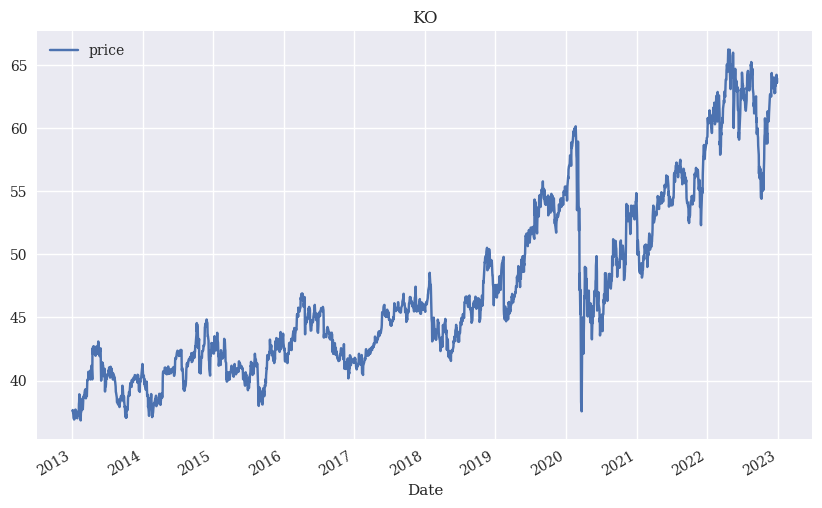

In [1977]:
if __name__ == '__main__':
 bb = BacktestBase('KO', '2013-1-1', '2023-12-31', 10000)
 print(bb.data.info())
 print(bb.data.tail())
 bb.plot_data()

In [1978]:
def run_mean_reversion_strategy(self, SMA, threshold):

    ''' Backtesting a mean reversion-based strategy.
    Parameters
    ==========
    SMA: int
    simple moving average in days
    threshold: float
    absolute value for deviation-based signal relative to SMA
    '''
    msg = f'\n\nRunning mean reversion strategy | '
    msg += f'SMA={SMA} & thr={threshold}'
    msg += f'\nfixed costs {self.ftc} | '
    msg += f'proportional costs {self.ptc}'
    print(msg)
    print('=' * 55)
    self.position = 0
    self.trades = 0
    self.amount = self.initial_amount
    self.data['SMA'] = self.data['price'].rolling(SMA).mean()
    for bar in range(SMA, len(self.data)):
        if self.position == 0:
            if (self.data['price'].iloc[bar] <
            self.data['SMA'].iloc[bar] - threshold):
                self.place_buy_order(bar, amount=self.amount)
                self.position = 1
        elif self.position == 1:
            if self.data['price'].iloc[bar] >= self.data['SMA'].iloc[bar]:
                self.place_sell_order(bar, units=self.units)
                self.position = 0
                self.close_out(bar)

In [1979]:
class BacktestLongOnly(BacktestBase):

    def run_sma_strategy(self, SMA1, SMA2):
        ''' Backtesting a SMA-based strategy.

        Parameters
        ==========
        SMA1, SMA2: int
            shorter and longer term simple moving average (in days)
        '''
        msg = f'\n\nRunning SMA strategy | SMA1={SMA1} & SMA2={SMA2}'
        msg += f'\nfixed costs {self.ftc} | '
        msg += f'proportional costs {self.ptc}'
        print(msg)
        print('=' * 55)
        self.position = 0  # initial neutral position
        self.trades = 0  # no trades yet
        self.amount = self.initial_amount  # reset initial capital
        self.data['SMA1'] = self.data['price'].rolling(SMA1).mean()
        self.data['SMA2'] = self.data['price'].rolling(SMA2).mean()

        for bar in range(SMA2, len(self.data)):
            if self.position == 0:
                if self.data['SMA1'].iloc[bar] > self.data['SMA2'].iloc[bar]:
                    self.place_buy_order(bar, amount=self.amount)
                    self.position = 1  # long position
            elif self.position == 1:
                if self.data['SMA1'].iloc[bar] < self.data['SMA2'].iloc[bar]:
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0  # market neutral
        self.close_out(bar)

    def run_momentum_strategy(self, momentum):
        ''' Backtesting a momentum-based strategy.

        Parameters
        ==========
        momentum: int
            number of days for mean return calculation
        '''
        msg = f'\n\nRunning momentum strategy | {momentum} days'
        msg += f'\nfixed costs {self.ftc} | '
        msg += f'proportional costs {self.ptc}'
        print(msg)
        print('=' * 55)
        self.position = 0  # initial neutral position
        self.trades = 0  # no trades yet
        self.amount = self.initial_amount  # reset initial capital
        self.data['momentum'] = self.data['return'].rolling(momentum).mean()
        for bar in range(momentum, len(self.data)):
            if self.position == 0:
                if self.data['momentum'].iloc[bar] > 0:
                    self.place_buy_order(bar, amount=self.amount)
                    self.position = 1  # long position
            elif self.position == 1:
                if self.data['momentum'].iloc[bar] < 0:
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0  # market neutral
        self.close_out(bar)

    def run_mean_reversion_strategy(self, SMA, threshold):
        ''' Backtesting a mean reversion-based strategy.

        Parameters
        ==========
        SMA: int
            simple moving average in days
        threshold: float
            absolute value for deviation-based signal relative to SMA
        '''
        msg = f'\n\nRunning mean reversion strategy | '
        msg += f'SMA={SMA} & thr={threshold}'
        msg += f'\nfixed costs {self.ftc} | '
        msg += f'proportional costs {self.ptc}'
        print(msg)
        print('=' * 55)
        self.position = 0
        self.trades = 0
        self.amount = self.initial_amount

        self.data['SMA'] = self.data['price'].rolling(SMA).mean()

        for bar in range(SMA, len(self.data)):
            if self.position == 0:
                if (self.data['price'].iloc[bar] <
                        self.data['SMA'].iloc[bar] - threshold):
                    self.place_buy_order(bar, amount=self.amount)
                    self.position = 1
            elif self.position == 1:
                if self.data['price'].iloc[bar] >= self.data['SMA'].iloc[bar]:
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0
        self.close_out(bar)

if __name__ == '__main__':
    def run_strategies():
        lobt.run_sma_strategy(42, 252)
        lobt.run_momentum_strategy(60)
        lobt.run_mean_reversion_strategy(50, 5)
    lobt = BacktestLongOnly('SPY', '2013-1-1', '2019-12-31', 10000,
                            verbose=False)
    run_strategies()
    # transaction costs: 10 USD fix, 1% variable
    lobt = BacktestLongOnly('SPY', '2013-1-1', '2019-12-31',
                            10000, 10.0, 0.01, False)
    run_strategies()

[*********************100%***********************]  10 of 10 completed


Running SMA strategy | SMA1=42 & SMA2=252
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 14698.42
Net Performance [%] 46.98
Trades Executed [#] 8


Running momentum strategy | 60 days
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 15085.09
Net Performance [%] 50.85
Trades Executed [#] 86


Running mean reversion strategy | SMA=50 & thr=5
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 15748.75
Net Performance [%] 57.49
Trades Executed [#] 43
[*********************100%***********************]  10 of 10 completed


Running SMA strategy | SMA1=42 & SMA2=252
fixed costs 10.0 | proportional costs 0.01
Final balance   [$] 13657.73
Net Performance [%] 36.58
Trades Executed [#] 8


Running momentum strategy | 60 days
fixed costs 10.0 | proportional costs 0.01
Final balance   [$] 5809.19
Net Performance [%] -41.91
Trades Executed [#] 86


Running mean reversion strategy | SMA=50 & t

In [1980]:




class BacktestLongShort(BacktestBase):

    def go_long(self, bar, units=None, amount=None):
        if self.position == -1:
            self.place_buy_order(bar, units=-self.units)
        if units:
            self.place_buy_order(bar, units=units)
        elif amount:
            if amount == 'all':
                amount = self.amount
            self.place_buy_order(bar, amount=amount)

    def go_short(self, bar, units=None, amount=None):
        if self.position == 1:
            self.place_sell_order(bar, units=self.units)
        if units:
            self.place_sell_order(bar, units=units)
        elif amount:
            if amount == 'all':
                amount = self.amount
            self.place_sell_order(bar, amount=amount)

    def run_sma_strategy(self, SMA1, SMA2):
        msg = f'\n\nRunning SMA strategy | SMA1={SMA1} & SMA2={SMA2}'
        msg += f'\nfixed costs {self.ftc} | '
        msg += f'proportional costs {self.ptc}'
        print(msg)
        print('=' * 55)
        self.position = 0  # initial neutral position
        self.trades = 0  # no trades yet
        self.amount = self.initial_amount  # reset initial capital
        self.data['SMA1'] = self.data['price'].rolling(SMA1).mean()
        self.data['SMA2'] = self.data['price'].rolling(SMA2).mean()

        for bar in range(SMA2, len(self.data)):
            if self.position in [0, -1]:
                if self.data['SMA1'].iloc[bar] > self.data['SMA2'].iloc[bar]:
                    self.go_long(bar, amount='all')
                    self.position = 1  # long position
            if self.position in [0, 1]:
                if self.data['SMA1'].iloc[bar] < self.data['SMA2'].iloc[bar]:
                    self.go_short(bar, amount='all')
                    self.position = -1  # short position
        self.close_out(bar)

    def run_momentum_strategy(self, momentum):
        msg = f'\n\nRunning momentum strategy | {momentum} days'
        msg += f'\nfixed costs {self.ftc} | '
        msg += f'proportional costs {self.ptc}'
        print(msg)
        print('=' * 55)
        self.position = 0  # initial neutral position
        self.trades = 0  # no trades yet
        self.amount = self.initial_amount  # reset initial capital
        self.data['momentum'] = self.data['return'].rolling(momentum).mean()
        for bar in range(momentum, len(self.data)):
            if self.position in [0, -1]:
                if self.data['momentum'].iloc[bar] > 0:
                    self.go_long(bar, amount='all')
                    self.position = 1  # long position
            if self.position in [0, 1]:
                if self.data['momentum'].iloc[bar] <= 0:
                    self.go_short(bar, amount='all')
                    self.position = -1  # short position
        self.close_out(bar)

    def run_mean_reversion_strategy(self, SMA, threshold):
        msg = f'\n\nRunning mean reversion strategy | '
        msg += f'SMA={SMA} & thr={threshold}'
        msg += f'\nfixed costs {self.ftc} | '
        msg += f'proportional costs {self.ptc}'
        print(msg)
        print('=' * 55)
        self.position = 0  # initial neutral position
        self.trades = 0  # no trades yet
        self.amount = self.initial_amount  # reset initial capital

        self.data['SMA'] = self.data['price'].rolling(SMA).mean()

        for bar in range(SMA, len(self.data)):
            if self.position == 0:
                if (self.data['price'].iloc[bar] <
                        self.data['SMA'].iloc[bar] - threshold):
                    self.go_long(bar, amount=self.initial_amount)
                    self.position = 1
                elif (self.data['price'].iloc[bar] >
                        self.data['SMA'].iloc[bar] + threshold):
                    self.go_short(bar, amount=self.initial_amount)
                    self.position = -1
            elif self.position == 1:
                if self.data['price'].iloc[bar] >= self.data['SMA'].iloc[bar]:
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0
            elif self.position == -1:
                if self.data['price'].iloc[bar] <= self.data['SMA'].iloc[bar]:
                    self.place_buy_order(bar, units=-self.units)
                    self.position = 0
        self.close_out(bar)


if __name__ == '__main__':
    def run_strategies():
        lsbt.run_sma_strategy(42, 252)
        lsbt.run_momentum_strategy(60)
        lsbt.run_mean_reversion_strategy(50, 5)
    lsbt = BacktestLongShort('SPY', '2013-1-1', '2019-12-31', 10000,
                             verbose=False)
    run_strategies()
    # transaction costs: 10 USD fix, 1% variable
    lsbt = BacktestLongShort('SPY', '2013-1-1', '2019-12-31',
                             10000, 10.0, 0.01, False)
    run_strategies()

[*********************100%***********************]  10 of 10 completed


Running SMA strategy | SMA1=42 & SMA2=252
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 12153.33
Net Performance [%] 21.53
Trades Executed [#] 14


Running momentum strategy | 60 days
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 11079.12
Net Performance [%] 10.79
Trades Executed [#] 170


Running mean reversion strategy | SMA=50 & thr=5
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 14254.61
Net Performance [%] 42.55
Trades Executed [#] 88
[*********************100%***********************]  10 of 10 completed


Running SMA strategy | SMA1=42 & SMA2=252
fixed costs 10.0 | proportional costs 0.01
Final balance   [$] 10521.63
Net Performance [%] 5.22
Trades Executed [#] 14


Running momentum strategy | 60 days
fixed costs 10.0 | proportional costs 0.01
Final balance   [$] 1224.67
Net Performance [%] -87.75
Trades Executed [#] 170


Running mean reversion strategy | SMA=50 

[                       0%                       ]

/tmp/ipykernel_1696984/2720610870.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[*********************100%***********************]  10 of 10 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2013-01-03 to 2022-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2517 non-null   float64
 1   return  2517 non-null   float64
dtypes: float64(2)
memory usage: 59.0 KB
None
                price    return
Date                           
2022-12-23  63.820000  0.007550
2022-12-27  64.209999  0.006092
2022-12-28  63.570000 -0.010017
2022-12-29  63.950001  0.005960
2022-12-30  63.610001 -0.005331


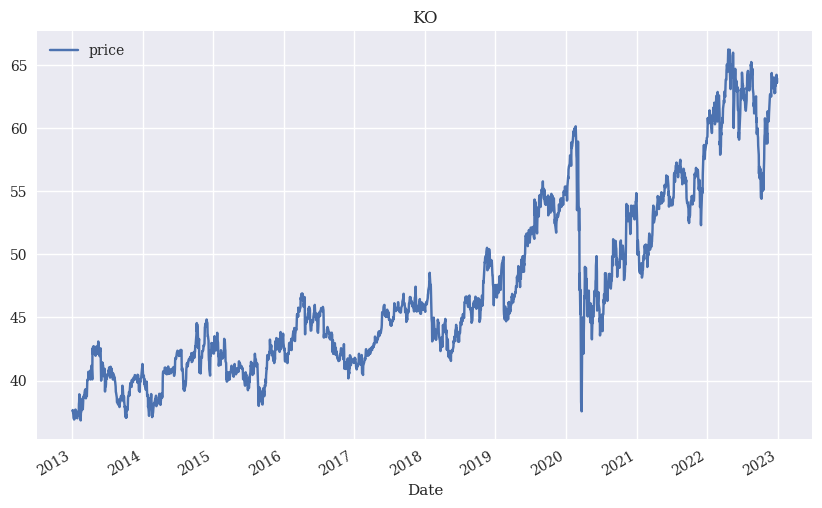

In [1981]:
#
# Python Script with Base Class
# for Event-Based Backtesting
#
# Python for Algorithmic Trading
# (c) Dr. Yves J. Hilpisch
# The Python Quants GmbH
#
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'


class BacktestBase(object):
    ''' Base class for event-based backtesting of trading strategies.

    Attributes
    ==========
    symbol: str
        TR RIC (financial instrument) to be used
    start: str
        start date for data selection
    end: str
        end date for data selection
    amount: float
        amount to be invested either once or per trade
    ftc: float
        fixed transaction costs per trade (buy or sell)
    ptc: float
        proportional transaction costs per trade (buy or sell)

    Methods
    =======
    get_data:
        retrieves and prepares the base data set
    plot_data:
        plots the closing price for the symbol
    get_date_price:
        returns the date and price for the given bar
    print_balance:
        prints out the current (cash) balance
    print_net_wealth:
        prints out the current net wealth
    place_buy_order:
        places a buy order
    place_sell_order:
        places a sell order
    close_out:
        closes out a long or short position
    '''

    def __init__(self, symbol, start, end, amount,
                 ftc=0.0, ptc=0.0, verbose=True):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_amount = amount
        self.amount = amount
        self.ftc = ftc
        self.ptc = ptc
        self.units = 0
        self.position = 0
        self.trades = 0
        self.verbose = verbose
        self.get_data()

    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        symbols = "SPY", "KO", "JPM", "COST", "XLU", "GLD", "CL", "JNJ", "XLU", "XLP", "X"
        raw = yf.download(symbols, start="2013-01-01", end="2023-01-01")
        raw = raw["Close"]
        raw = pd.DataFrame(raw[self.symbol])
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['return'] = np.log(raw / raw.shift(1))
        self.data = raw.dropna()

    def plot_data(self, cols=None):
        ''' Plots the closing prices for symbol.
        '''
        if cols is None:
            cols = ['price']
        self.data[cols].plot(figsize=(10, 6), title=self.symbol)

    def get_date_price(self, bar):
        ''' Return date and price for bar.
        '''
        date = str(self.data.index[bar])[:10]
        price = self.data.price.iloc[bar]
        return date, price

    def print_balance(self, bar):
        ''' Print out current cash balance info.
        '''
        date, price = self.get_date_price(bar)
        print(f'{date} | current balance {self.amount:.2f}')

    def print_net_wealth(self, bar):
        ''' Print out current cash balance info.
        '''
        date, price = self.get_date_price(bar)
        net_wealth = self.units * price + self.amount
        print(f'{date} | current net wealth {net_wealth:.2f}')

    def place_buy_order(self, bar, units=None, amount=None):
        ''' Place a buy order.
        '''
        date, price = self.get_date_price(bar)
        if units is None:
            units = int(amount / price)
        self.amount -= (units * price) * (1 + self.ptc) + self.ftc
        self.units += units
        self.trades += 1
        if self.verbose:
            print(f'{date} | buying {units} units at {price:.2f}')
            self.print_balance(bar)
            self.print_net_wealth(bar)

    def place_sell_order(self, bar, units=None, amount=None):
        ''' Place a sell order.
        '''
        date, price = self.get_date_price(bar)
        if units is None:
            units = int(amount / price)
        self.amount += (units * price) * (1 - self.ptc) - self.ftc
        self.units -= units
        self.trades += 1
        if self.verbose:
            print(f'{date} | selling {units} units at {price:.2f}')
            self.print_balance(bar)
            self.print_net_wealth(bar)

    def close_out(self, bar):
        ''' Closing out a long or short position.
        '''
        date, price = self.get_date_price(bar)
        self.amount += self.units * price
        self.units = 0
        self.trades += 1
        if self.verbose:
            print(f'{date} | inventory {self.units} units at {price:.2f}')
            print('=' * 55)
        print('Final balance   [$] {:.2f}'.format(self.amount))
        perf = ((self.amount - self.initial_amount) /
                self.initial_amount * 100)
        print('Net Performance [%] {:.2f}'.format(perf))
        print('Trades Executed [#] {}'.format(self.trades))
        print('=' * 55)


if __name__ == '__main__':
    bb = BacktestBase('KO', '2013-1-1', '2022-12-31', 10000)
    print(bb.data.info())
    print(bb.data.tail())
    bb.plot_data()


In [1982]:
#Simulation and Kelly criterion
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import plt, mpl

In [1983]:
np.random.seed(1000)
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

/tmp/ipykernel_1696984/2717831202.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [1984]:
p = 0.55
f = p - (1 - p)
f
I = 50
n = 100

In [1985]:
def run_simulation(f):
    c = np.zeros((n, I))
    c[0] = 100
    for i in range(I):
        for t in range(1, n):
            o = np.random.binomial(1, p)
            if o > 0:
                c[t, i] = (1 + f) * c[t - 1, i]
            else:
                c[t, i] = (1 - f) * c[t - 1, i]
    return c


In [1986]:
c_1 = run_simulation(f)

In [1987]:
c_1.round(2)

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [ 90.  , 110.  ,  90.  , ..., 110.  ,  90.  , 110.  ],
       [ 99.  , 121.  ,  99.  , ..., 121.  ,  81.  , 121.  ],
       ...,
       [226.35, 338.13, 413.27, ..., 123.97, 123.97, 123.97],
       [248.99, 371.94, 454.6 , ..., 136.37, 136.37, 136.37],
       [273.89, 409.14, 409.14, ..., 122.73, 150.01, 122.73]])

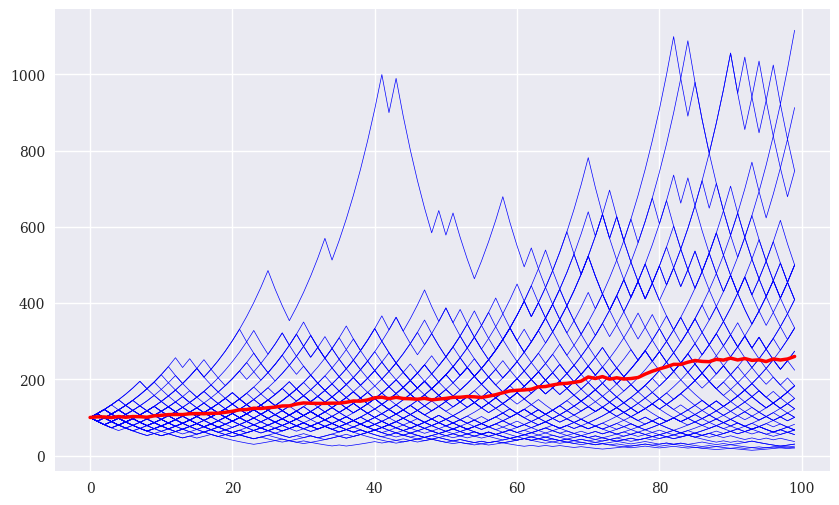

In [1988]:
plt.figure(figsize=(10, 6))
plt.plot(c_1, 'b', lw=0.5)
plt.plot(c_1.mean(axis=1), 'r', lw=2.5); 

In [1989]:
c_2 = run_simulation(0.05)
c_3 = run_simulation(0.25)
c_4 = run_simulation(0.33)

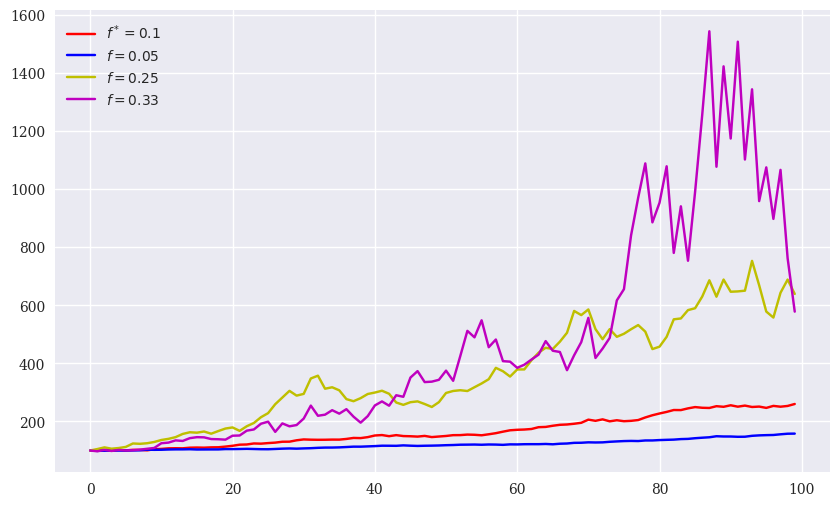

In [1990]:
plt.figure(figsize=(10, 6))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f=0.05$')
plt.plot(c_3.mean(axis=1), 'y', label='$f=0.25$')
plt.plot(c_4.mean(axis=1), 'm', label='$f=0.33$')
plt.legend(loc=0);

In [2020]:
symbols = "SPY"
data = yf.download(symbols, start="2013-01-01", end="2023-01-01")


[*********************100%***********************]  1 of 1 completed


In [2021]:
data = data["Close"]

In [2022]:
data = pd.DataFrame(data)

In [2023]:

data.dropna(inplace=True)
data

,Close
Date,
2013-01-02,146.059998
2013-01-03,145.729996
2013-01-04,146.369995
2013-01-07,145.970001
2013-01-08,145.550003
...,...
2022-12-23,382.910004
2022-12-27,381.399994
2022-12-28,376.660004


In [2024]:
data['return'] = np.log(data / data.shift(1))
data.dropna(inplace=True)


In [2025]:
data.tail()

,Close,return
Date,,
2022-12-23,382.910004,0.005736
2022-12-27,381.399994,-0.003951
2022-12-28,376.660004,-0.012506
2022-12-29,383.440002,0.017840
2022-12-30,382.429993,-0.002638


In [2026]:
mu = data['return'].mean() * 252 
mu

0.09636753639303451

In [2027]:
sigma = data['return'].std() * 252 ** 0.5
sigma

0.17505897673664103

In [2028]:
r = 0.0
f = (mu - r) / sigma ** 2
f

3.144575202649715

In [2029]:
equs = []

In [2030]:
def kelly_strategy(f):
    global equs
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)
    data[equ] = 1
    data[cap] = data[equ] * f
    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i]
        data.loc[t, cap] = data[cap].loc[t_1] * \
                            math.exp(data['return'].loc[t])
        data.loc[t, equ] = data[cap].loc[t] - \
                            data[cap].loc[t_1] + \
                            data[equ].loc[t_1]
        data.loc[t, cap] = data[equ].loc[t] * f

In [2031]:
kelly_strategy(f * 0.5)

In [2032]:
kelly_strategy(f * 0.66) 

In [2033]:
kelly_strategy(f) 

In [2034]:
print(data[equs].tail())

            equity_1.57  equity_2.08  equity_3.14
Date                                             
2022-12-23     3.976317     5.258569     7.268690
2022-12-27     3.951662     5.215530     7.178554
2022-12-28     3.874446     5.081006     6.898013
2022-12-29     3.984100     5.270823     7.288464
2022-12-30     3.967599     5.242009     7.228093


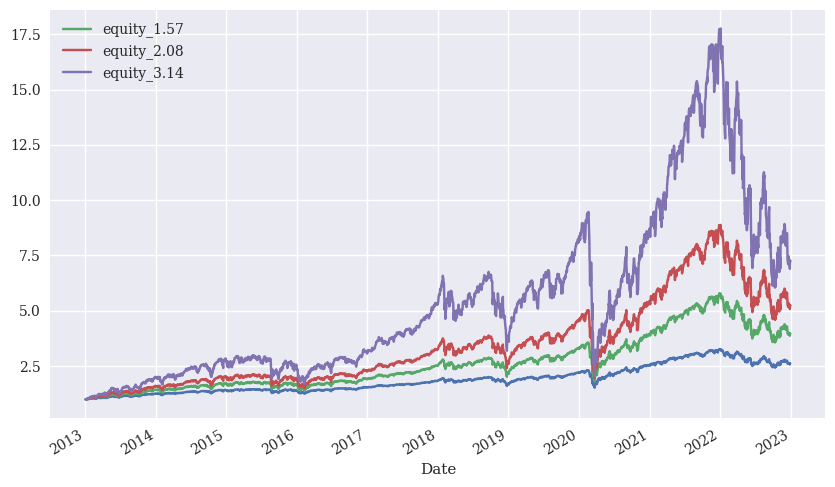

In [2036]:
ax = data['return'].cumsum().apply(np.exp).plot(figsize=(10, 6))
data[equs].plot(ax=ax, legend=True);